# Task 4 - Stock Market & News Headline Prediction using Numerical and Textual Analysis

## Author: Md. Abul Ala Walid

### Problem Statement:

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [30]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sdf = pd.read_csv('india-news-headlines.csv')

In [33]:
sdf.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [34]:
sdf.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [48]:
len(sdf['headline_category'].unique())

1016

In [49]:
sdf.shape

(3297172, 3)

In [53]:
# plt.figure(figsize = (20, 6))

# rr = sns.countplot('headline_category', data = sdf)
# for p in rr.patches:
#     rr.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')


# plt.show()

In [37]:
strain = sdf[sdf['publish_date'] < 20180101]
stest = sdf[sdf['publish_date'] > 20180101]

In [38]:
strain.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [39]:
data = strain['headline_text']
data.replace("[^a-zA-Z]"," ", regex=True, inplace=True)

/home/walid/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [40]:
data.tail()

2769552    Pay Rs    lakh fine for not vacating official ...
2769553    Motorists using BRTS lanes will be warned for ...
2769554    Kothrud residents frolic as curtain falls on e...
2769555    Rera dismisses ghazal singer Chitra Singh s re...
2769556    Kamala Mills fire   Above owners  relatives he...
Name: headline_text, dtype: object

In [42]:
sdf['headline_text'] = sdf['headline_text'].str.lower()

In [43]:
sdf.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,status quo will not be disturbed at ayodhya; s...
2,20010102,unknown,fissures in hurriyat over pak visit
3,20010102,unknown,america's unwanted heading for india?
4,20010102,unknown,for bigwigs; it is destination goa


In [54]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/walid/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
corpus=[]
new= sdf['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

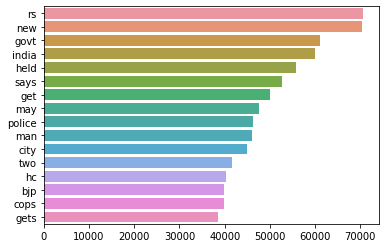

In [56]:
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

In [58]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

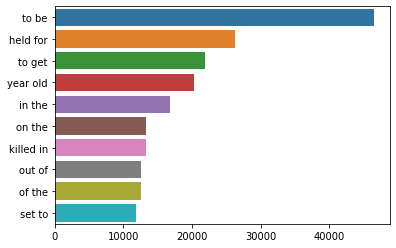

In [60]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(sdf['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

In [61]:
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

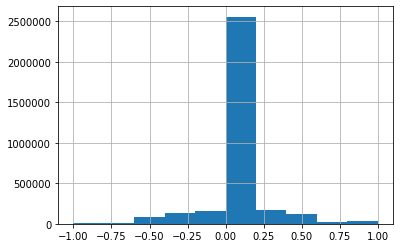

In [62]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
sdf['polarity_score']=sdf['headline_text'].\
   apply(lambda x : polarity(x))
sdf['polarity_score'].hist()
plt.show()

In [189]:
import pandas as pd
df = pd.read_csv('ES=F.csv')

In [190]:
print(df.shape)
print(df.head(10))

(306, 7)
         Date     Open     High      Low    Close  Adj Close     Volume
0  2019-10-21  2984.75  3007.50  2983.75  3006.50    3006.50   886557.0
1  2019-10-22  3006.50  3014.25  2988.25  2994.50    2994.50  1125601.0
2  2019-10-23  2992.00  3006.00  2982.00  3005.75    3005.75  1055958.0
3  2019-10-24  3006.00  3015.25  2998.75  3004.25    3004.25  1061278.0
4  2019-10-25  3003.75  3026.50  3000.00  3020.25    3020.25  1098391.0
5  2019-10-27  3023.00  3026.00  3022.75  3024.25    3024.25   855745.0
6  2019-10-28  3023.00  3042.75  3022.75  3036.25    3036.25  1041931.0
7  2019-10-29  3038.25  3046.25  3029.50  3035.75    3035.75  1040149.0
8  2019-10-30  3036.50  3055.00  3023.25  3047.75    3047.75  1179153.0
9  2019-10-31  3051.75  3052.00  3020.25  3035.75    3035.75  1766536.0


In [191]:
df=df[['Date', 'Close']]

In [192]:
df.head()

,Date,Close
0,2019-10-21,3006.50
1,2019-10-22,2994.50
2,2019-10-23,3005.75
3,2019-10-24,3004.25
4,2019-10-25,3020.25


In [193]:
df=df.dropna()
df.shape

(296, 2)

In [194]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [195]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [196]:
dset=df
df.head()

,Close
Date,
2019-10-21,3006.50
2019-10-22,2994.50
2019-10-23,3005.75
2019-10-24,3004.25
2019-10-25,3020.25


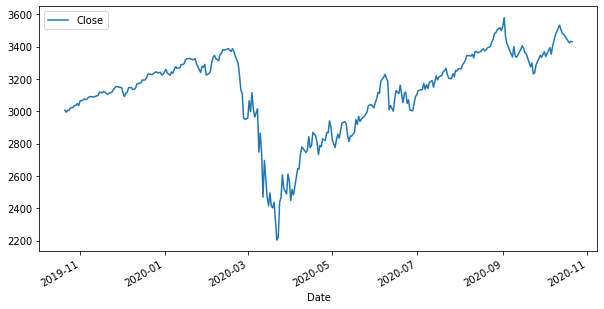

In [197]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
df.plot()

In [198]:
from statsmodels.tsa.stattools import adfuller

In [199]:
test_result=adfuller(df['Close'])

In [200]:

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



In [201]:
adfuller_test(df['Close'])

ADF Test Statistic : -1.7350696255815803
p-value : 0.41314010484646213
#Lags Used : 9
Number of Observations Used : 286
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [202]:
df['Close First Difference']= df['Close'] - df['Close'].shift(1)

In [203]:
df['Seasonal First Difference']=df['Close']-df['Close'].shift(12)

In [204]:
df.head(14)

,Close,Close First Difference,Seasonal First Difference
Date,,,
2019-10-21,3006.50,NaN,NaN
2019-10-22,2994.50,-12.00,NaN
2019-10-23,3005.75,11.25,NaN
2019-10-24,3004.25,-1.50,NaN
2019-10-25,3020.25,16.00,NaN
2019-10-27,3024.25,4.00,NaN
2019-10-28,3036.25,12.00,NaN
2019-10-29,3035.75,-0.50,NaN
2019-10-30,3047.75,12.00,NaN


In [205]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.029574445902658
p-value : 0.032223310475259476
#Lags Used : 16
Number of Observations Used : 267
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


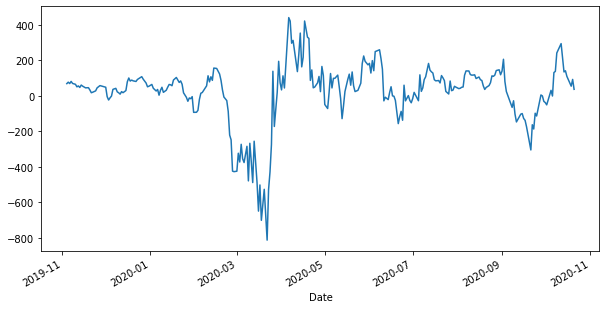

In [206]:
df['Seasonal First Difference'].plot()

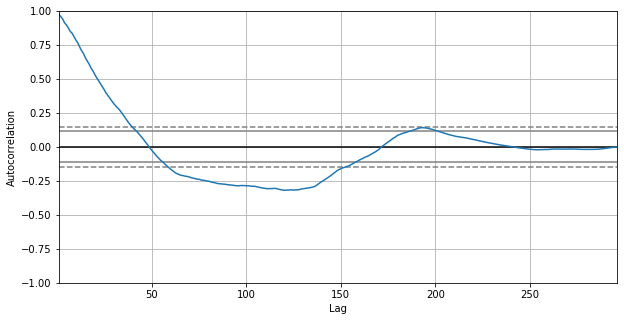

In [207]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

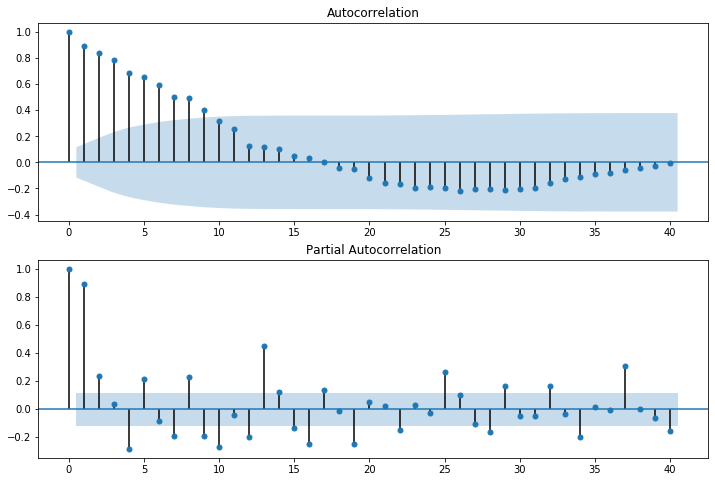

In [208]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [181]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


model=ARIMA(df['Close'],order=(5,0,1))
model_fit=model.fit()

/home/walid/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [182]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  296
Model:                     ARMA(5, 1)   Log Likelihood               -1581.206
Method:                       css-mle   S.D. of innovations             50.239
Date:                Wed, 21 Oct 2020   AIC                           3178.411
Time:                        22:57:54   BIC                           3207.934
Sample:                             0   HQIC                          3190.232
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3145.2341    133.486     23.562      0.000    2883.606    3406.862
ar.L1.Close     0.7936      0.191      4.147      0.000       0.419       1.169
ar.L2.Close     0.2666      0.157      1.700      0.090      -0.041       0.574
ar.L3.Close     0.1361      0.088      1.555      0.121      -0.035       0.308
ar.L4.Close    -0.4026      0.077     -5.219      0.000      -0.554      -0.251
ar.L5.Close     0.1869      0.075      2.508      0.013       0.041       0.333
ma.L1.Close     0.0284      0.190      0.150      0.881      -0.344       0.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8994           -0.9083j            1.2782           -0.3742
AR.2           -0.8994           +0.9083j            1.2782            0.3742
AR.3            1.0182           -0.0000j            1.0182           -0.0000
AR.4            1.4672           -1.0313j            1.7934           -0.0975
AR.5            1.4672           +1.0313j            1.7934            0.0975
MA.1          -35.2064           +0.0000j           35.2064            0.5000
-----------------------------------------------------------------------------
"""

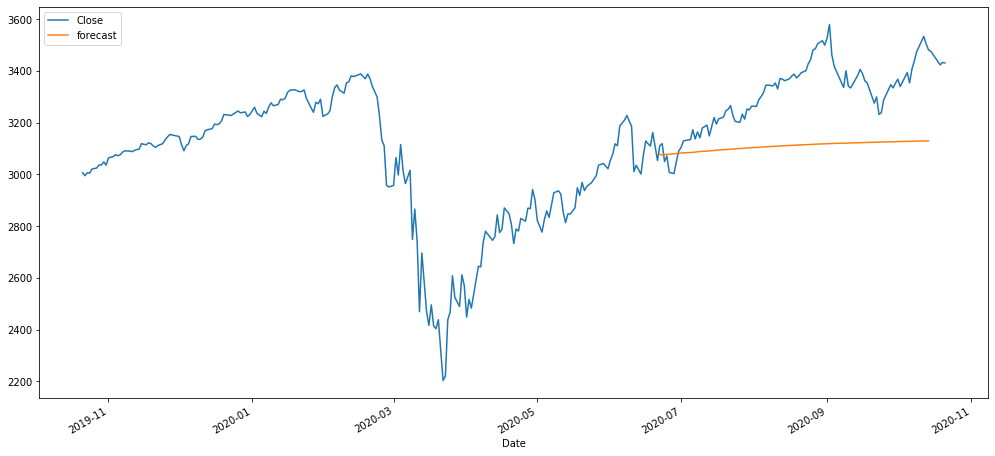

In [180]:
df['forecast']=model_fit.predict(start=200,end=290,dynamic=True)
df[['Close','forecast']].plot(figsize=(17,8))

In [234]:
import statsmodels.api as sm

m=sm.tsa.statespace.SARIMAX(df['Close'],order=(5, 1, 1),seasonal_order=(5, 1, 1,12))
results=m.fit()

/home/walid/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


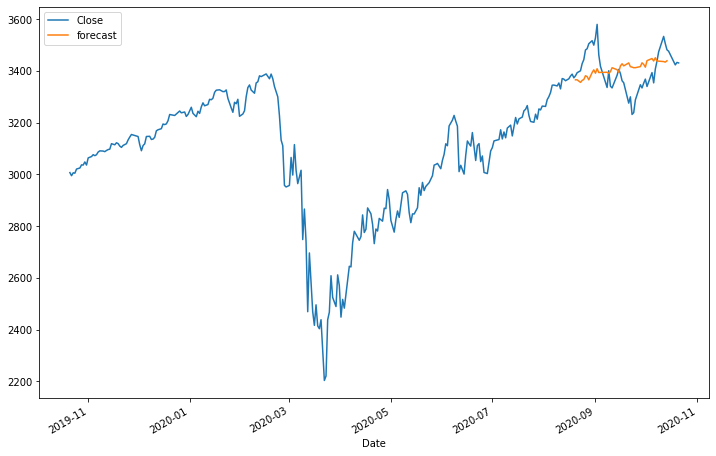

In [235]:
df['forecast']=results.predict(start=250,end=290,dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))

In [217]:
df

,Close,Close First Difference,Seasonal First Difference,forecast
Date,,,,
2019-10-21,3006.50,NaN,NaN,NaN
2019-10-22,2994.50,-12.00,NaN,NaN
2019-10-23,3005.75,11.25,NaN,NaN
2019-10-24,3004.25,-1.50,NaN,NaN
2019-10-25,3020.25,16.00,NaN,NaN
...,...,...,...,...
2020-10-15,3475.50,-5.50,141.75,NaN
2020-10-16,3462.25,-13.25,110.25,NaN
2020-10-19,3422.75,-39.50,55.00,NaN


#### SARIMA SHOWS BETTER ACCURACY THAN ARIMA FOR OUR CASE